In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('training_set.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [3]:
# First we will try to fit the model on full dataframe 

X, y = df.loc[:,df.columns !='Y'], df['Y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=4, stratify=y)

In [4]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(3128, 57) (782, 57)
(3128,) (782,)


For this classification problem I have tried to use Logistic regression, Random Forest and XGBOOST classifiers and compare their accuracy , ROC-AUC values.

# Logistic Regression over the whole dataset

In [5]:
clf = LogisticRegression(solver='liblinear',random_state=0).fit(X_train, y_train)

In [6]:
clf.classes_

array([0, 1], dtype=int64)

In [7]:
predict_prob = clf.predict_proba(X_val)[:,1]

In [8]:
score = clf.score(X_val, y_val)
print(f'the accuracy of the model is {score}')

the accuracy of the model is 0.9258312020460358


In [9]:
print(roc_auc_score(y_val, predict_prob))

0.9697514143665352


In [10]:
predictions  = clf.predict(X_val)
print(y.shape, predictions.shape)

(3910,) (782,)


In [11]:
confusion_mat = confusion_matrix(y_val, predictions)
print(confusion_mat)

[[448  27]
 [ 31 276]]


In [12]:
accuracy = (448+276)/(448+27+31+276)
print(accuracy)
#Just evaluating the model

0.9258312020460358


Now in instance two we will try to select some features and then fit the model again 


In [13]:
colname = list(df.columns)
print(len(colname))

58


# Here we have tried to reduce the number of variables using Mutual information


I have tried to check the variability of values in the column and dropped those column which has a variance of less than 0.5

In [14]:
colstoKeep = []
for col in colname:
    if df[col].var() > 0.5:
        colstoKeep.append(col)

print(len(colstoKeep))

17


In [15]:
dfnew = df[colstoKeep]
print(dfnew.shape)

(3910, 17)


In [16]:

X2, y2 = dfnew.loc[:,dfnew.columns !='Y'], df['Y']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size= 0.2, random_state=4, stratify=y2)

In [17]:
clf2 = LogisticRegression(solver='liblinear',random_state=0).fit(X_train2, y_train2)

In [18]:
predict_prob = clf2.predict_proba(X_val2)[:,1]
print(roc_auc_score(y_val, predict_prob))

0.9294976855820334


In [19]:
predictions2  = clf2.predict(X_val2)

In [20]:
confusion_mat = confusion_matrix(y_val2, predictions2)
print(confusion_mat)

[[429  46]
 [ 63 244]]


In [21]:
accuracy2 = (717+415)/(717+68+91+415)
print(f'the accuracy with 17 features is {accuracy2}')

the accuracy with 17 features is 0.876839659178931


In [22]:
#feature selection using mutual info classification

In [23]:
mutual_info = mutual_info_classif(X_train, y_train)

In [24]:
mutual_info = pd.Series(mutual_info)

In [25]:
mutual_info.index = X_train.columns

In [26]:
mutual_info.sort_values(ascending=False)

X52    0.210711
X56    0.198255
X21    0.183165
X55    0.180157
X53    0.163361
X7     0.150429
X57    0.144045
X16    0.136254
X24    0.134218
X25    0.121504
X19    0.117960
X23    0.112997
X5     0.101243
X2     0.098543
X27    0.096388
X17    0.086503
X3     0.076674
X10    0.072449
X26    0.071893
X11    0.069533
X20    0.065043
X8     0.061440
X9     0.059097
X6     0.056749
X54    0.056667
X12    0.055913
X18    0.053717
X15    0.051951
X1     0.047135
X45    0.047059
X50    0.042752
X43    0.039972
X29    0.037215
X46    0.036254
X42    0.035077
X13    0.034493
X49    0.032629
X31    0.031732
X36    0.030941
X28    0.030533
X32    0.030242
X30    0.029202
X39    0.028663
X35    0.026249
X37    0.025161
X34    0.021915
X48    0.018404
X40    0.017690
X44    0.017041
X51    0.016668
X14    0.012977
X47    0.008412
X33    0.007654
X41    0.004011
X4     0.002761
X38    0.000000
X22    0.000000
dtype: float64

<AxesSubplot:>

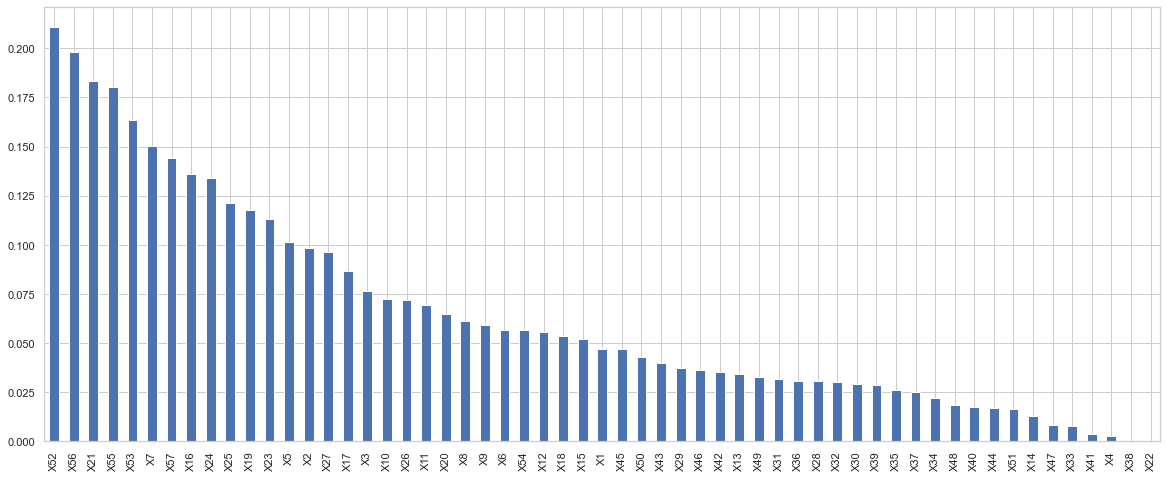

In [27]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [28]:
colstoKeep_mutual = mutual_info[mutual_info >= 0.05]

In [29]:
colstoKeep_mutual = colstoKeep_mutual.index.to_list()

In [30]:
colstoKeep_mutual

['X2',
 'X3',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57']

In [31]:
df_mutual = df[colstoKeep_mutual]

In [32]:
print(colstoKeep_mutual)

['X2', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X23', 'X24', 'X25', 'X26', 'X27', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']


# Here I have used Logistic Regression over those variable which have min 5 percent contribution on output variable


In [33]:

X_m, y_m = df_mutual.loc[:,df_mutual.columns !='Y'], df['Y']
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_m, y_m, test_size= 0.2, random_state=4, stratify=y2)

In [34]:
clf_m = LogisticRegression(solver='liblinear',random_state=0).fit(X_train_m, y_train_m)

In [35]:
predict_prob_m = clf_m.predict_proba(X_val_m)[:,1]
print(roc_auc_score(y_val_m, predict_prob_m))

0.9606377507286132


In [36]:
confusion_mat = confusion_matrix(y_val2, predictions2)
print(confusion_mat)

[[429  46]
 [ 63 244]]


In [37]:
accuracy_log_m = (429+244)/(429+46+63+244)
print(f'the accuracy in the mutualinfo {accuracy_log_m}')

the accuracy in the mutualinfo 0.860613810741688


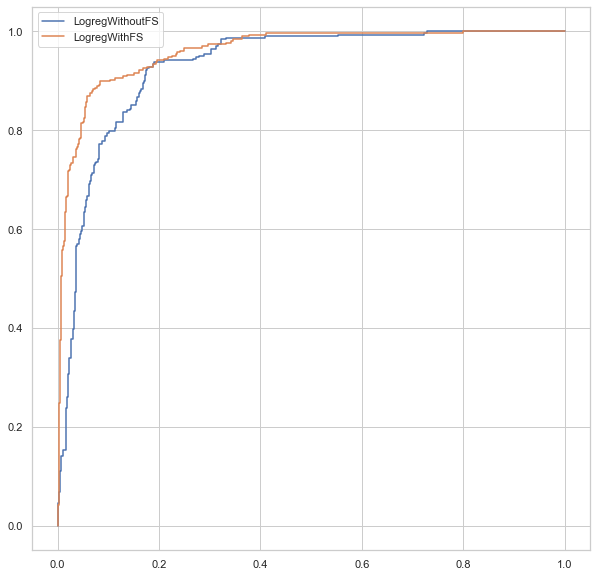

In [38]:


fpr1, tpr1, threshold1 = roc_curve(y_val, predict_prob)

fpr2, tpr2, threshold2 = roc_curve(y_val_m, predict_prob_m)
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label = "LogregWithoutFS")

plt.plot(fpr2, tpr2, label="LogregWithFS")
plt.legend(loc='best')
plt.show()


# Using XGBOOST on the whole dataset

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb
from sklearn import metrics

In [41]:
xgb_cl = xgb.XGBClassifier()

print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [42]:
X, y = df.loc[:,df.columns !='Y'], df['Y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=4, stratify=y)

In [43]:
print(X_train.shape, y_train.shape)

(3128, 57) (3128,)


In [44]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict

preds_xgb = xgb_cl.predict(X_val)

# Score
accuracy_score(y_val, preds_xgb)
print("Accuracy:", accuracy_score(y_val, preds_xgb))

Accuracy: 0.9398976982097187


In [45]:
predict_prob_xgb = xgb_cl.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, predict_prob_xgb))

0.988218755357449


# Using XGBOOST on those variable which have min 5 percent contribution on output variable

In [46]:
X_m, y_m = df_mutual.loc[:,df_mutual.columns !='Y'], df['Y']
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_m, y_m, test_size= 0.2, random_state=4, stratify=y2)

In [47]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train_m, y_train_m)

# Predict
preds_xgb_m = xgb_cl.predict(X_val_m)

# Score
accuracy_score(y_val_m, preds_xgb_m)

0.9296675191815856

In [48]:
predict_prob_xgb_m = xgb_cl.predict_proba(X_val_m)[:,1]
print("ROC_AUC score:",roc_auc_score(y_val_m, predict_prob_xgb_m))

ROC_AUC score: 0.9840356591805246


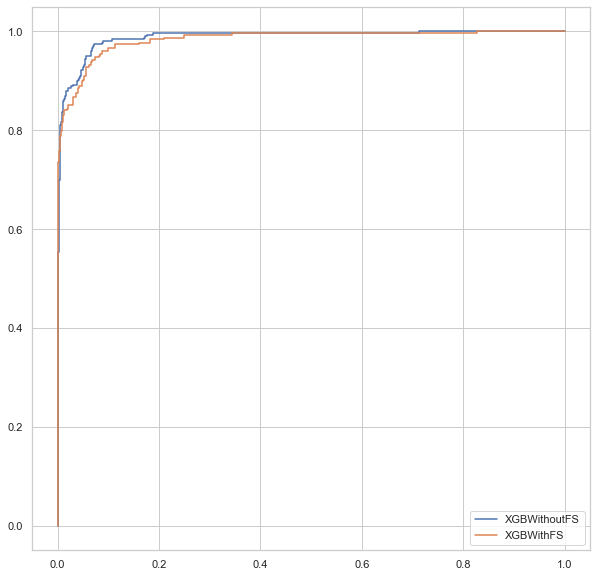

In [49]:

fpr1, tpr1, threshold1 = roc_curve(y_val, predict_prob_xgb)

fpr2, tpr2, threshold2 = roc_curve(y_val_m, predict_prob_xgb_m)
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label = "XGBWithoutFS")

plt.plot(fpr2, tpr2, label="XGBWithFS")
plt.legend(loc='best')
plt.show()

# Using Random forest on the whole dataset

In [50]:
from sklearn.ensemble import RandomForestClassifier 

In [51]:
RF_cl=RandomForestClassifier(n_estimators=100)
RF_cl.fit(X_train,y_train)

y_pred_RF=RF_cl.predict(X_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_RF))

Accuracy: 0.9411764705882353


In [52]:
predict_prob_RF = RF_cl.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val, predict_prob_RF))

0.9875878621635521


# Using Random forest on those variable which have min 5 percent contribution on output variable

In [53]:
RF_cl_m=RandomForestClassifier(n_estimators=100)
RF_cl_m.fit(X_train_m,y_train_m)

y_pred_RF_m =RF_cl_m.predict(X_val_m)
print("Accuracy:",metrics.accuracy_score(y_val_m, y_pred_RF_m))

Accuracy: 0.9347826086956522


In [54]:
predict_prob_RF_m = RF_cl_m.predict_proba(X_val_m)[:,1]
print("ROC-AUC score:",roc_auc_score(y_val_m, predict_prob_RF_m))

ROC-AUC score: 0.9799965712326419


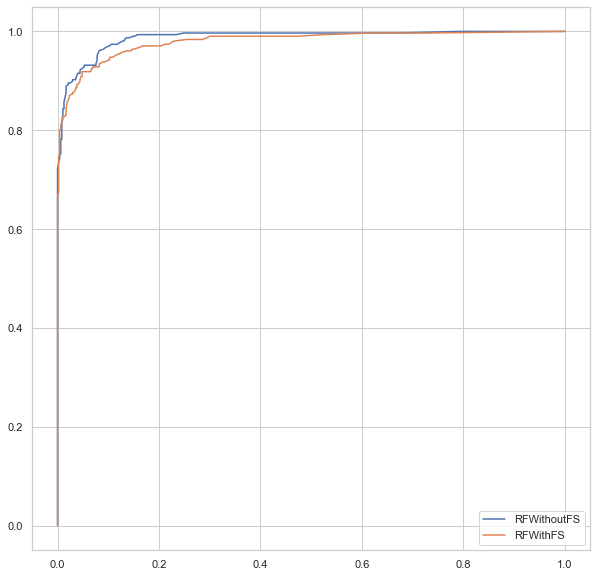

In [55]:
fpr1, tpr1, threshold1 = roc_curve(y_val, predict_prob_RF)

fpr2, tpr2, threshold2 = roc_curve(y_val_m, predict_prob_RF_m)
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label = "RFWithoutFS")

plt.plot(fpr2, tpr2, label="RFWithFS")
plt.legend(loc='best')
plt.show()

# Consolidated report on model performance

In [56]:

data = [['Logistic Regression on whole dataset', score, roc_auc_score(y_val, predict_prob),'57'],
       ['Logistic Regression on Feature selected dataset', accuracy_log_m, roc_auc_score(y_val_m, predict_prob_m),'28'],
       ['XGBOOST on whole dataset',accuracy_score(y_val, preds_xgb),roc_auc_score(y_val, predict_prob_xgb),'57'],
       ['XGBOOST on Feature selected dataset',accuracy_score(y_val_m, preds_xgb_m),roc_auc_score(y_val_m, predict_prob_xgb_m),'28'],
        ['Random forest on whole dataset',metrics.accuracy_score(y_val, y_pred_RF),roc_auc_score(y_val, predict_prob_RF),'57'],
        ['Random forest on Feature selected dataset',metrics.accuracy_score(y_val_m, y_pred_RF_m),roc_auc_score(y_val_m, predict_prob_RF_m),'28']]

df1= pd.DataFrame(data, columns = ['Model', 'accuracy','roc-auc','No. of variables'])
df1.reset_index()
df1


,Model,accuracy,roc-auc,No. of variables
0,Logistic Regression on whole dataset,0.925831,0.929498,57
1,Logistic Regression on Feature selected dataset,0.860614,0.960638,28
2,XGBOOST on whole dataset,0.939898,0.988219,57
3,XGBOOST on Feature selected dataset,0.929668,0.984036,28
4,Random forest on whole dataset,0.941176,0.987588,57
5,Random forest on Feature selected dataset,0.934783,0.979997,28


In [57]:
df1.to_csv('Consolidate Report on Model performance.csv')

I have tried to use mutual information for variable reduction, but it did not improve any accuracy.From the above report we can see that Random forest on whole dataset performs the best. So we are going to use it for prediction.

# Prediction over the test dataset

In [58]:
test = pd.read_csv('test_set.csv', index_col = 0)

In [59]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [60]:
test.loc[:,'y']= RF_cl.predict(test)

In [61]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1


In [62]:
test.to_csv('Test_Dataset_after_prediction.csv')